In [1]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [2]:
churn_df = churn_data
print (churn_df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

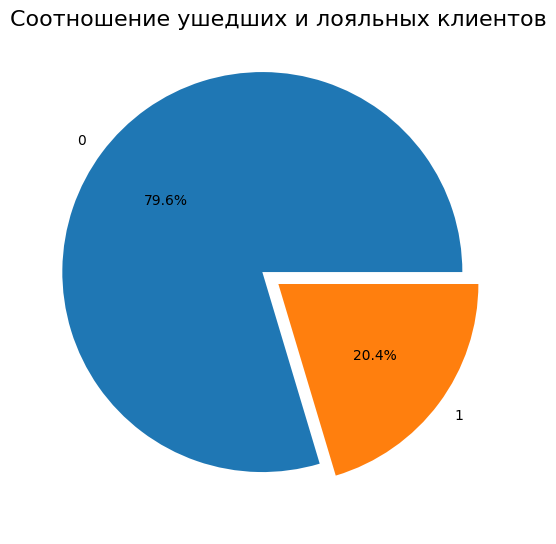

In [3]:
import matplotlib.pyplot as plt
exited_data = churn_df['Exited'].value_counts()[:2]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_data,
    labels=exited_data.index,
    autopct='%.1f%%',
    explode = [0.1, 0]
);

title = axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16)
plt.show(fig)

Из данных диаграммы следует, что доля ушедших клиентов - 20.4%, а активных 79.6%.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

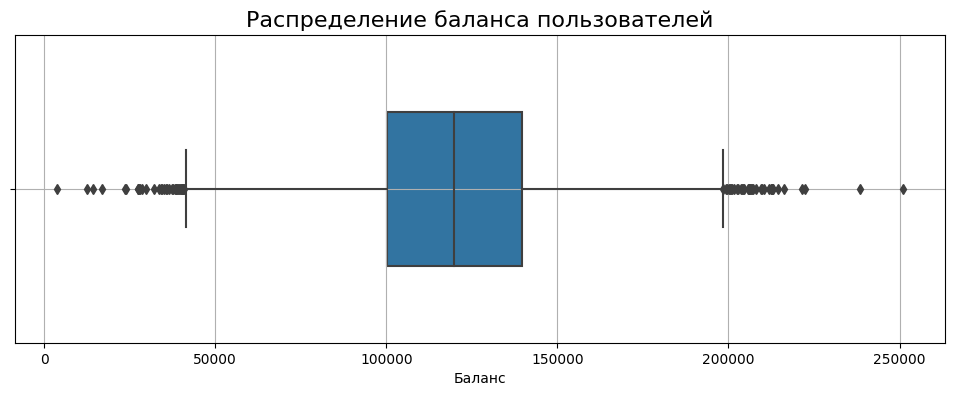

In [17]:
import seaborn as sns
fig = plt.figure(figsize = (12, 4))
boxplot = sns.boxplot(
    data = churn_data[churn_data['Balance']>2500],
    x='Balance',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение баланса пользователей', fontsize=16);
boxplot.set_xlabel('Баланс');
boxplot.grid()

Распределение баланса показывает, что диапазон от 100000 до 140000 самый распространенный- 50% пользователей; судя по медиане одинаковое количество пользователей (по 25%) имеет баланс 100000-120000 и 120000-140000 соответственно. Также максимальный баланс чуть меньше 200000.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

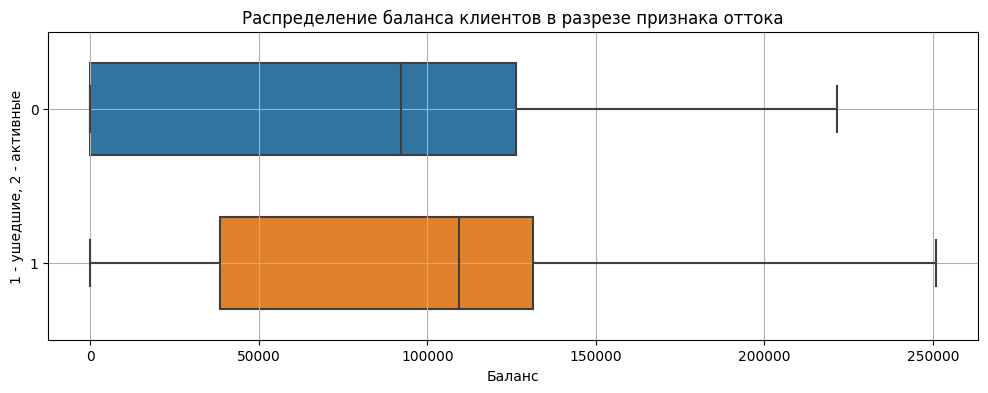

In [18]:
fig = plt.figure(figsize=(12, 4))
boxplot = sns.boxplot(
    data = churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.6
)
boxplot.set_title('Распределение баланса клиентов в разрезе признака оттока');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('1 - ушедшие, 2 - активные');
boxplot.grid()

Среди активных пользователей максимальный разброс баланса от 0 до 125000 показывает, что не у всех клиентов есть деньги на счетах, также судя по медиане у большинства из них баланс до 90000. У ушедших разброс баланса не так велик - от 40000 до 130000, из которых у большинства баланс до 110000. Судя по балансу ушедших можно предположить, что клиентов не устраивали условия, например % на остаток или % по вкладу/накопительному счету.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

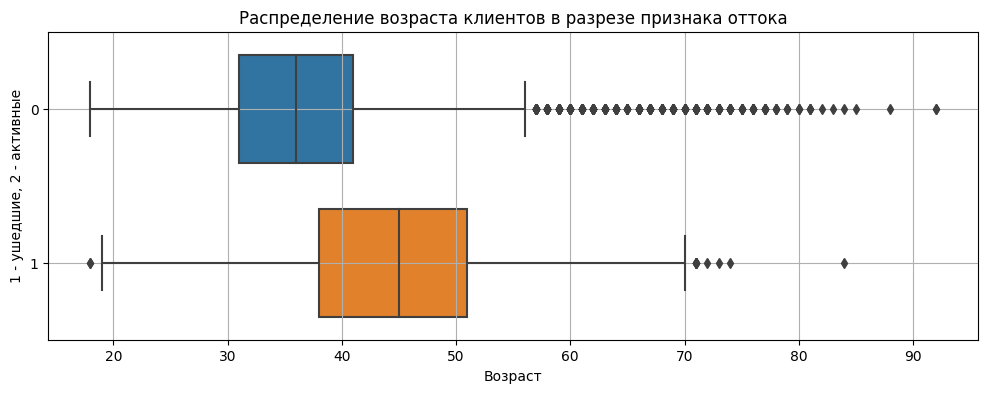

In [19]:
fig = plt.figure(figsize=(12, 4))
boxplot = sns.boxplot(
    data = churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.7
)
boxplot.set_title('Распределение возраста клиентов в разрезе признака оттока');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('1 - ушедшие, 2 - активные');
boxplot.grid()

Больше потенциальных выбросов в группе активных пользователей, где такой возраст составляет от 56 до 90+. Среди ушедших возрастная группа от 38 до 52, по медиане 45, отсюда следует, что банку следует обратить внимание на возрастную группу от 42-52 лет, тк в группе активных возраст до 42 включительно.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

<AxesSubplot: xlabel='CreditScore', ylabel='EstimatedSalary'>

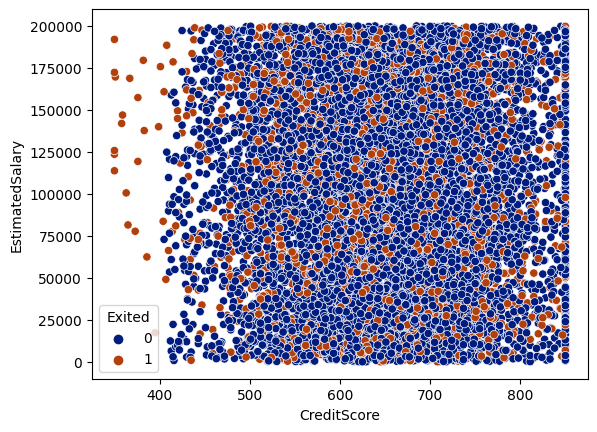

In [24]:
sns.scatterplot(
    x='CreditScore',
    y='EstimatedSalary',
    data=churn_data,
    palette='dark',
    hue='Exited',
)

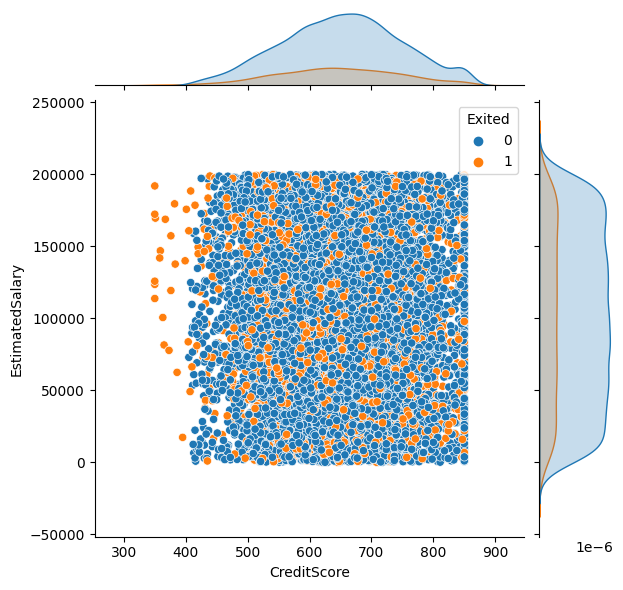

In [22]:
jointplot = sns.jointplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
)

Исходя из данных графиков явной взаимосвязи кредитного рейтинга клиента и его предполагаемой зарплаты нет.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

<AxesSubplot: xlabel='Gender', ylabel='count'>

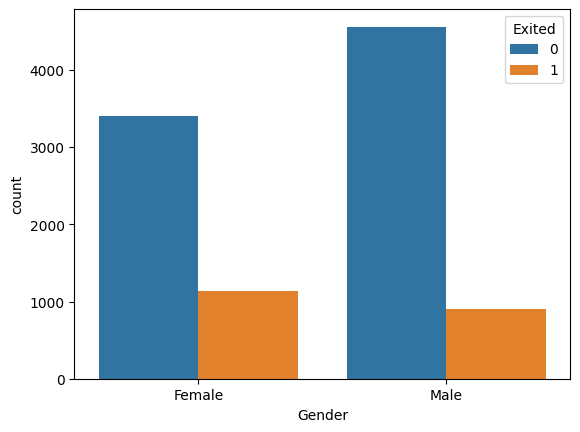

In [25]:
sns.countplot(data=churn_df, x="Gender", hue="Exited" )

Чаще уходят женщины, что иллюстрирует график.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

<AxesSubplot: xlabel='NumOfProducts', ylabel='count'>

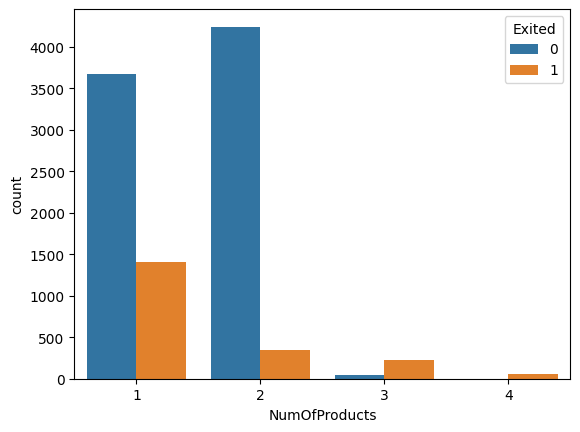

In [26]:
sns.countplot(data=churn_df, x="NumOfProducts", hue="Exited" )

Самый большой отток среди клиентов, имеющих 1 банковскую услугу. По графику очевидно, что чем больше у клиента услуг, тем меньше отток.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

<AxesSubplot: xlabel='IsActiveMember', ylabel='count'>

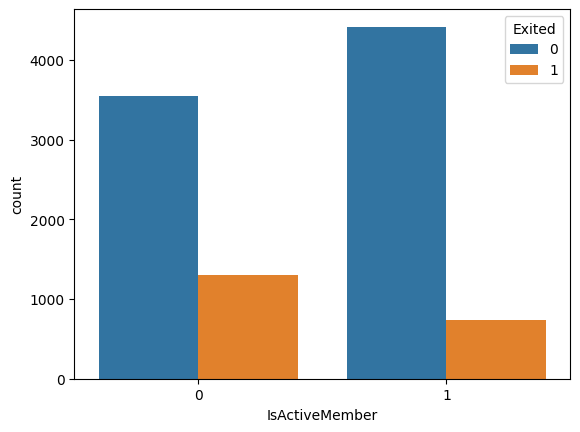

In [27]:
sns.countplot(data=churn_df, x="IsActiveMember", hue="Exited" )

Статус активного клиента влияет на отток, тк среди активных клиентов отток гораздо меньше, а среди неактивных довольно высок. Возможно банку стоит предложить неактивным клиентам приобретать улуги банка на более выгодных условиях.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [4]:
churn_countries = churn_data.groupby('Geography',as_index=False)['Exited'].mean()
churn_countries

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


In [34]:
import plotly
import plotly.express as px
fig = px.choropleth(
    data_frame = churn_countries,
    locations='Geography',
    locationmode="country names",
    color='Exited',
    range_color=[0, 0.4],
    title='Доля ушедших клиентов по странам',
    width=900,
    height=700,
    color_continuous_scale='Temps'
    )

fig.show()

Как мы видим, самая большая доля ушедших клиентов у Германии, далее Испания и Франция. Возможно в Германии большой выбор банков с более выгодными условиями.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [8]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

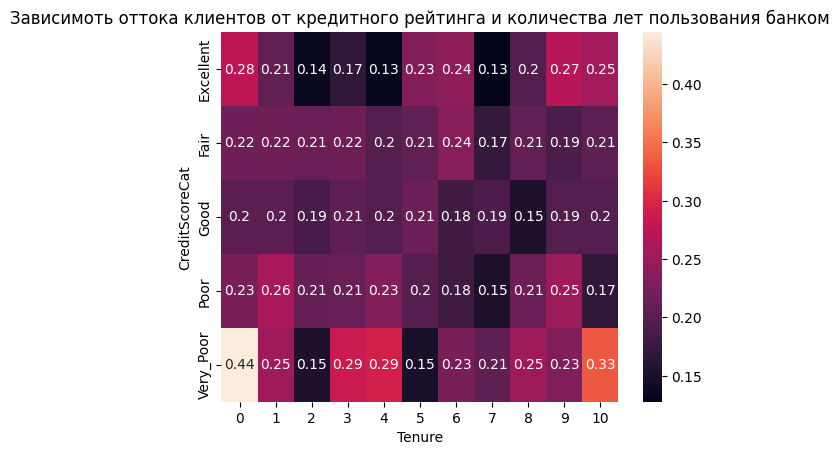

In [36]:
import seaborn as sns
churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)
pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
)
fig = plt.figure()
ax = sns.heatmap(data=pivot,annot=True);
ax.set_title('Зависимоть оттока клиентов от кредитного рейтинга и количества лет пользования банком');

Самый большой отток клиентов наблюдается среди группы с самым низким кредитным рейтингом и до года сотрудничеcтва с банком, далее клиенты с этим же рейтингом, но 10 годами сотрудничества, и на 3-ем месте опять же клиенты с этим же рейтингом, но 3-4 годами сотрудничества. В целом, категория клиентов с самым низким кредитным рейтингом уходит чаще всего.